<a href="https://colab.research.google.com/github/Kirtiwardhan01/ML-/blob/master/Mumbai_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Loading the packages and dataset

In [0]:
### Importing the packages

from warnings import filterwarnings

import pandas as pd               
import numpy as np
import pickle

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)

pd.set_option('display.max_columns', 100)

**Reading the file**

In [0]:
mumbai = pd.read_csv(r"Mumbai_Housing.csv")

In [0]:
#Checking the top 5 rows of the dataset
mumbai.head()

,CrimeRate,PropResidential,PropBusiness,MasterWaterCanal,NitricOxide,AvgRooms,NumberofPlaygrounds,Before1980,DistanceFromBusinessCenter,AccessibilityToHighway,Tax,TeacherStudentRatio,BaseCorruptionRate,BelowMiddleClass,PriceCrore
0,0.00632,18.0,2.31,0.0,0.538,6.575,2.0,65.2,4.09,1.0,296,15.3,396.90,4.98,0.240
1,0.02731,0.0,7.07,0.0,0.469,6.421,3.0,78.9,4.9671,2.0,242,17.8,396.90,9.14,0.216
2,0.02729,0.0,7.07,0.0,0.469,7.185,1.0,61.1,4.9671,2.0,242,17.8,392.83,4.03,0.347
3,0.03237,0.0,2.18,0.0,0.458,6.998,3.0,45.8,6.0622,3.0,222,18.7,394.63,2.94,0.334
4,0.06905,0.0,2.18,0.0,0.458,7.147,NaN,54.2,6.0622,3.0,222,18.7,396.90,5.33,0.362


In [0]:
#Checking the info of the dataset
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 15 columns):
CrimeRate                     453 non-null float64
PropResidential               452 non-null float64
PropBusiness                  452 non-null float64
MasterWaterCanal              451 non-null float64
NitricOxide                   451 non-null float64
AvgRooms                      452 non-null float64
NumberofPlaygrounds           14 non-null float64
Before1980                    452 non-null float64
DistanceFromBusinessCenter    452 non-null object
AccessibilityToHighway        452 non-null float64
Tax                           454 non-null int64
TeacherStudentRatio           454 non-null float64
BaseCorruptionRate            454 non-null float64
BelowMiddleClass              454 non-null float64
PriceCrore                    451 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 53.3+ KB


There are missing values in few of the columns that need to be dealt with 

In [0]:
#Let's check the sum of missing values
mumbai.isnull().sum()

CrimeRate                       1
PropResidential                 2
PropBusiness                    2
MasterWaterCanal                3
NitricOxide                     3
AvgRooms                        2
NumberofPlaygrounds           440
Before1980                      2
DistanceFromBusinessCenter      2
AccessibilityToHighway          2
Tax                             0
TeacherStudentRatio             0
BaseCorruptionRate              0
BelowMiddleClass                0
PriceCrore                      3
dtype: int64

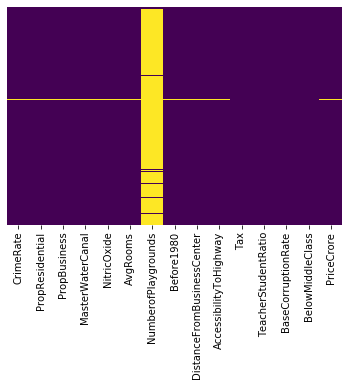

In [0]:
#Let's vizualise the missing values
sns.heatmap(mumbai.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So we can observe that the column NumberOfPlaygrounds have 90% of the missing values. We can drop the column

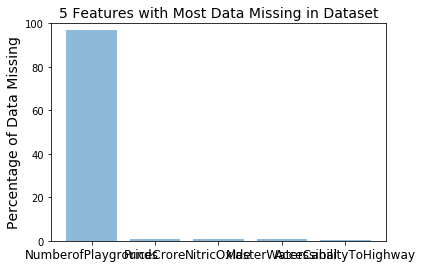

In [0]:
#Visualize the percentage of features with most data missing

mumbai_missingpercent = 100 * (mumbai.isnull().sum()/mumbai.isnull().count()).sort_values(ascending=False)

plt.Figure(figsize=(5,5),dpi = 400)
plt.bar(np.arange(5), mumbai_missingpercent[:5], align='center', alpha=0.5)
plt.xticks(np.arange(5), mumbai_missingpercent.index[:5], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('5 Features with Most Data Missing in Dataset', fontsize = 14) 
# plt.savefig('5 Features with Most Data Missing in Dataset.jpg')
plt.show()


In [0]:
#Removing the column that has more that 90% of missing values 

mumbai_null = mumbai.isnull().sum() / len(mumbai)
missing_features = mumbai_null[mumbai_null > 0.90].index
mumbai.drop(missing_features, axis=1, inplace=True)

In [0]:
#Let's check the shape
mumbai.shape

(454, 14)

In [0]:
print(mumbai.isnull().sum())
print(mumbai.dtypes)


CrimeRate                     1
PropResidential               2
PropBusiness                  2
MasterWaterCanal              3
NitricOxide                   3
AvgRooms                      2
Before1980                    2
DistanceFromBusinessCenter    2
AccessibilityToHighway        2
Tax                           0
TeacherStudentRatio           0
BaseCorruptionRate            0
BelowMiddleClass              0
PriceCrore                    3
dtype: int64
CrimeRate                     float64
PropResidential               float64
PropBusiness                  float64
MasterWaterCanal              float64
NitricOxide                   float64
AvgRooms                      float64
Before1980                    float64
DistanceFromBusinessCenter     object
AccessibilityToHighway        float64
Tax                             int64
TeacherStudentRatio           float64
BaseCorruptionRate            float64
BelowMiddleClass              float64
PriceCrore                    float64
dtype: 

In [0]:
#Converting the dtype of DistanceFromBusinessCenter to numeric
mumbai.DistanceFromBusinessCenter = pd.to_numeric(mumbai.DistanceFromBusinessCenter)
print(mumbai.DistanceFromBusinessCenter.dtype)

float64


In [0]:
#First we'll check the way to fill-in the missing values by using descriptive statistics
mumbai.describe()

,CrimeRate,PropResidential,PropBusiness,MasterWaterCanal,NitricOxide,AvgRooms,Before1980,DistanceFromBusinessCenter,AccessibilityToHighway,Tax,TeacherStudentRatio,BaseCorruptionRate,BelowMiddleClass,PriceCrore
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,3.482966,12.777778,10.381200,0.077778,0.546677,6.301671,67.318444,3.937680,8.548889,384.915556,18.248444,358.885000,12.343133,0.230436
std,9.000030,24.365296,6.718973,0.268120,0.118629,0.724506,28.977610,2.184197,8.075565,156.682739,2.204300,87.436451,7.331529,0.095129
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,0.050000
25%,0.071848,0.000000,4.930000,0.000000,0.447000,5.885500,41.200000,2.042000,4.000000,277.000000,16.800000,376.247500,6.627500,0.172250
50%,0.218480,0.000000,8.140000,0.000000,0.516500,6.214000,76.250000,3.495200,5.000000,309.000000,18.600000,391.340000,10.425000,0.217000
75%,1.764360,20.000000,18.100000,0.000000,0.624000,6.630750,94.300000,5.401100,8.000000,432.000000,20.200000,396.120000,16.417500,0.266750
max,88.976200,100.000000,25.650000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,37.970000,0.500000


In [0]:
#Dropping the missing values from rest of the features
mumbai.dropna(inplace=True)

In [0]:
#Let's check the info and shape 
print(mumbai.isnull().sum())
print(mumbai.shape)

CrimeRate                     0
PropResidential               0
PropBusiness                  0
MasterWaterCanal              0
NitricOxide                   0
AvgRooms                      0
Before1980                    0
DistanceFromBusinessCenter    0
AccessibilityToHighway        0
Tax                           0
TeacherStudentRatio           0
BaseCorruptionRate            0
BelowMiddleClass              0
PriceCrore                    0
dtype: int64
(450, 14)


In [0]:
#Let's recheck the descriptive stats aftet dropping missing values
mumbai.describe()

,CrimeRate,PropResidential,PropBusiness,MasterWaterCanal,NitricOxide,AvgRooms,Before1980,DistanceFromBusinessCenter,AccessibilityToHighway,Tax,TeacherStudentRatio,BaseCorruptionRate,BelowMiddleClass,PriceCrore
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,3.482966,12.777778,10.381200,0.077778,0.546677,6.301671,67.318444,3.937680,8.548889,384.915556,18.248444,358.885000,12.343133,0.230436
std,9.000030,24.365296,6.718973,0.268120,0.118629,0.724506,28.977610,2.184197,8.075565,156.682739,2.204300,87.436451,7.331529,0.095129
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,0.050000
25%,0.071848,0.000000,4.930000,0.000000,0.447000,5.885500,41.200000,2.042000,4.000000,277.000000,16.800000,376.247500,6.627500,0.172250
50%,0.218480,0.000000,8.140000,0.000000,0.516500,6.214000,76.250000,3.495200,5.000000,309.000000,18.600000,391.340000,10.425000,0.217000
75%,1.764360,20.000000,18.100000,0.000000,0.624000,6.630750,94.300000,5.401100,8.000000,432.000000,20.200000,396.120000,16.417500,0.266750
max,88.976200,100.000000,25.650000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,37.970000,0.500000


### **EDA**

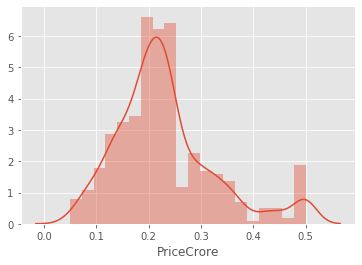

In [0]:
#Let's check the distribution of PriceCrore
#check the spread of House Prices
from matplotlib import style
style.use('ggplot')
sns.distplot(mumbai.PriceCrore,bins=20,kde=True)

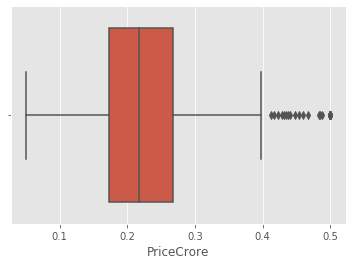

In [0]:
sns.boxplot(mumbai.PriceCrore)

There are few values that are outliers

In [0]:
#skewness and kurtosis
print("Skewness: %f" % mumbai['PriceCrore'].skew())
print("Kurtosis: %f" % mumbai['PriceCrore'].kurt())

Skewness: 1.011062
Kurtosis: 1.128905


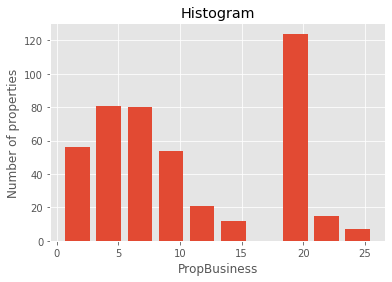

In [0]:
# Most of the properties here are business properties
score = mumbai['PropBusiness']
plt.hist(score, histtype='bar', rwidth=0.8)
plt.xlabel('PropBusiness')
plt.ylabel('Number of properties')
plt.title('Histogram')
plt.show()

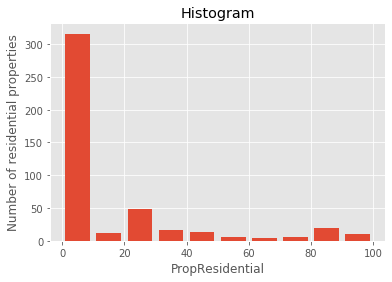

In [0]:
# Most of the properties here are business properties
score2 = mumbai['PropResidential']
plt.hist(score2, histtype='bar', rwidth=0.8)
plt.xlabel('PropResidential')
plt.ylabel('Number of residential properties')
plt.title('Histogram')
plt.show()

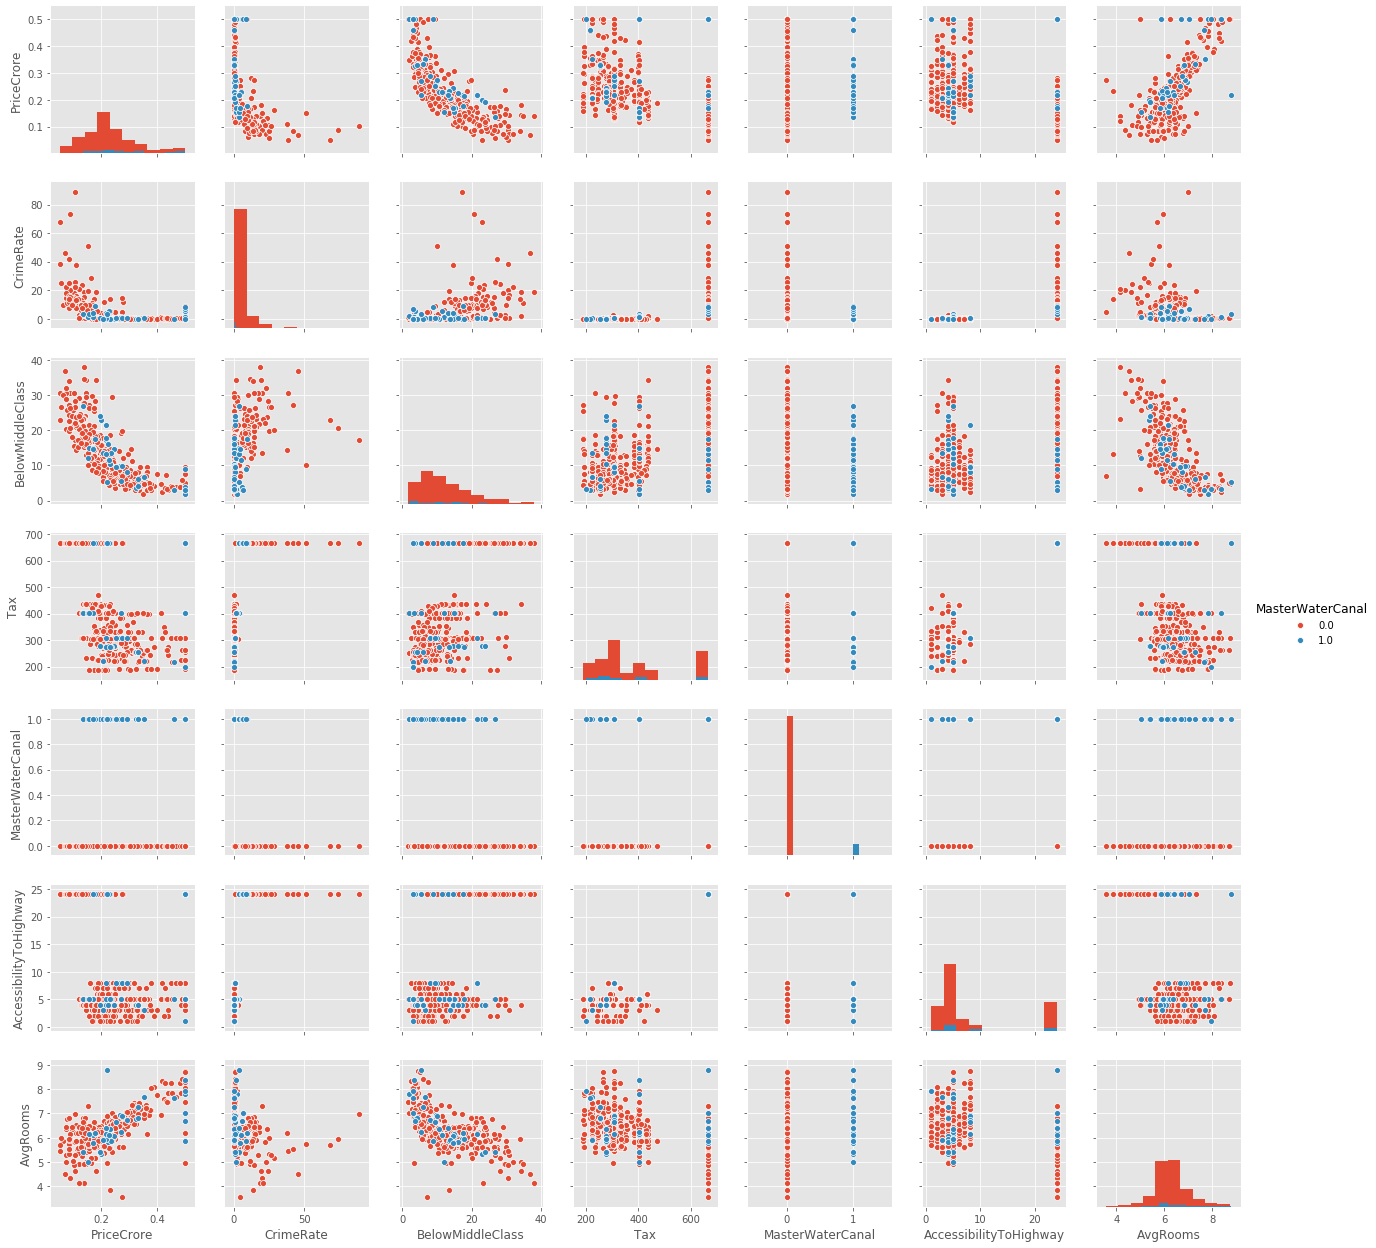

In [0]:
cols = ['PriceCrore', 'CrimeRate', 'BelowMiddleClass', 'Tax', 'MasterWaterCanal','AccessibilityToHighway','AvgRooms' ]
g = sns.pairplot(mumbai[cols], 
                 diag_kind="hist",hue='MasterWaterCanal')


In [0]:
#Let's plot correlation map
corr_mumbai = mumbai.corr().round(2)
corr_mumbai

,CrimeRate,PropResidential,PropBusiness,MasterWaterCanal,NitricOxide,AvgRooms,Before1980,DistanceFromBusinessCenter,AccessibilityToHighway,Tax,TeacherStudentRatio,BaseCorruptionRate,BelowMiddleClass,PriceCrore
CrimeRate,1.00,-0.20,0.42,-0.05,0.42,-0.23,0.35,-0.39,0.66,0.63,0.29,-0.41,0.46,-0.39
PropResidential,-0.20,1.00,-0.53,-0.06,-0.51,0.31,-0.57,0.66,-0.30,-0.29,-0.36,0.18,-0.41,0.35
PropBusiness,0.42,-0.53,1.00,0.10,0.78,-0.41,0.65,-0.71,0.58,0.68,0.33,-0.39,0.61,-0.47
MasterWaterCanal,-0.05,-0.06,0.10,1.00,0.11,0.09,0.10,-0.12,0.03,0.00,-0.10,0.05,-0.04,0.16
NitricOxide,0.42,-0.51,0.78,0.11,1.00,-0.32,0.74,-0.77,0.62,0.68,0.15,-0.37,0.59,-0.41
AvgRooms,-0.23,0.31,-0.41,0.09,-0.32,1.00,-0.26,0.20,-0.25,-0.31,-0.37,0.15,-0.62,0.71
Before1980,0.35,-0.57,0.65,0.10,0.74,-0.26,1.00,-0.75,0.48,0.52,0.24,-0.28,0.61,-0.36
DistanceFromBusinessCenter,-0.39,0.66,-0.71,-0.12,-0.77,0.20,-0.75,1.00,-0.52,-0.54,-0.19,0.31,-0.49,0.22
AccessibilityToHighway,0.66,-0.30,0.58,0.03,0.62,-0.25,0.48,-0.52,1.00,0.92,0.44,-0.48,0.52,-0.39
Tax,0.63,-0.29,0.68,0.00,0.68,-0.31,0.52,-0.54,0.92,1.00,0.42,-0.49,0.55,-0.46


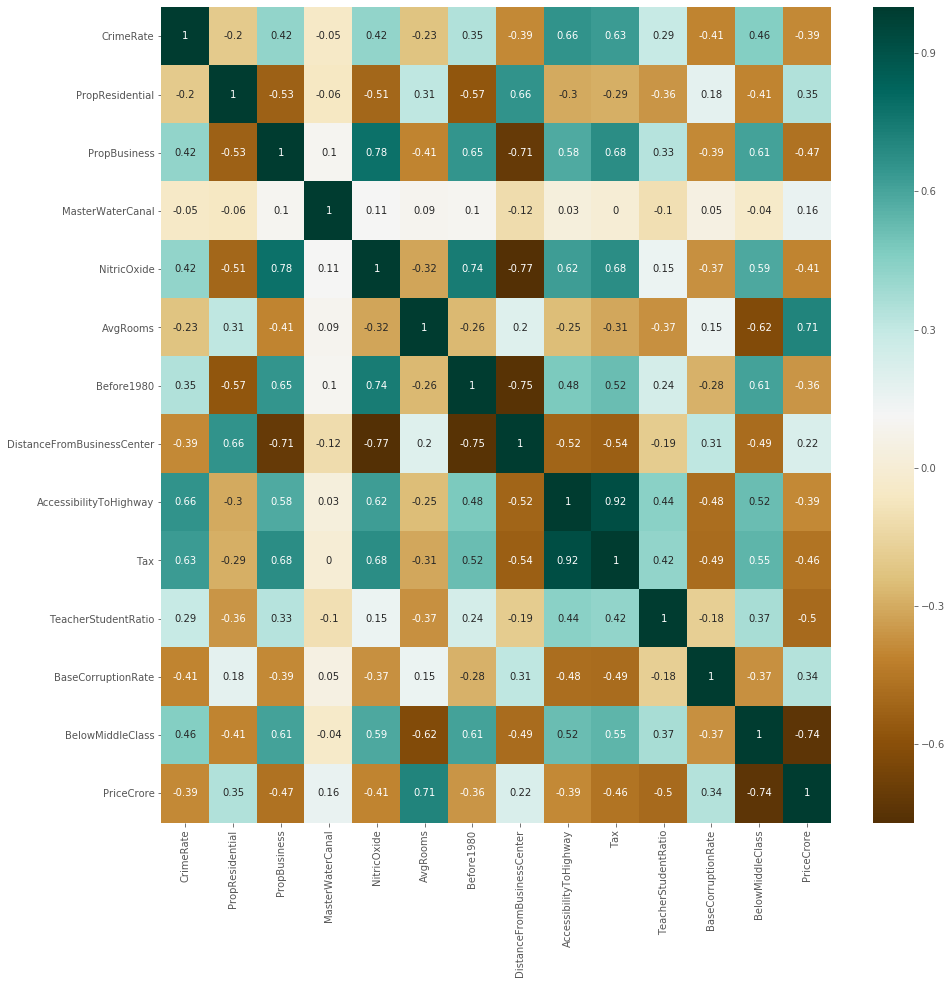

In [0]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_mumbai,cmap="BrBG",annot=True)

From above Tax and Accessibilitytohighway are positively correlated
So we have to drop one of the above features 

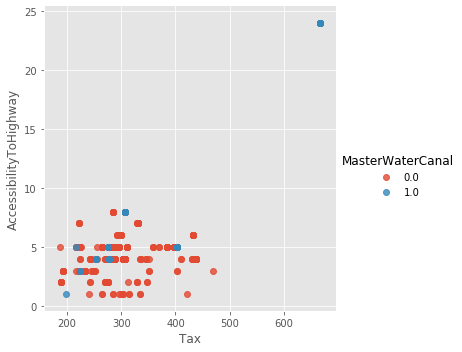

In [0]:
sns.lmplot(x="Tax",y="AccessibilityToHighway",hue="MasterWaterCanal",data=mumbai,
                      fit_reg=False)

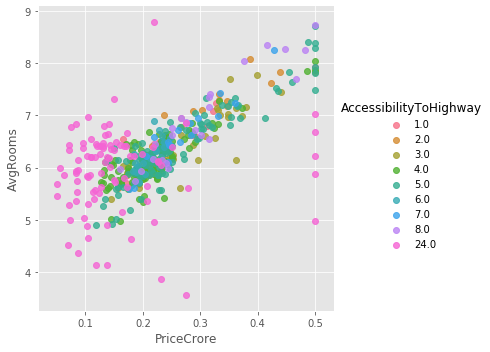

In [0]:
#Let's check how AvgRooms and PriceCrore
sns.lmplot(x="PriceCrore",y="AvgRooms",hue="AccessibilityToHighway",data=mumbai,
                      fit_reg=False)

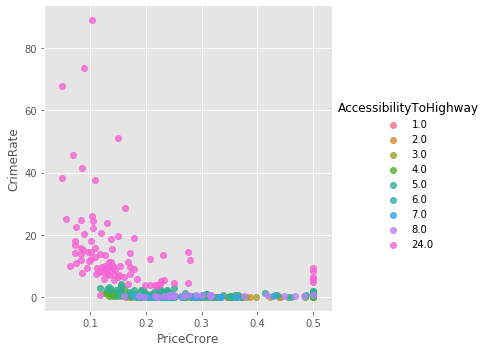

In [0]:
#Let's check how CrimeRate and PriceCrore behave
sns.lmplot(x="PriceCrore",y="CrimeRate",hue="AccessibilityToHighway",data=mumbai,
                      fit_reg=False)

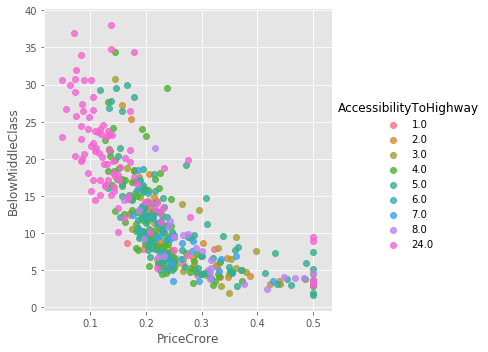

In [0]:
#Let's check how BelowMiddleClass and PriceCrore
sns.lmplot(x="PriceCrore",y="BelowMiddleClass",hue="AccessibilityToHighway",data=mumbai,
                      fit_reg=False)

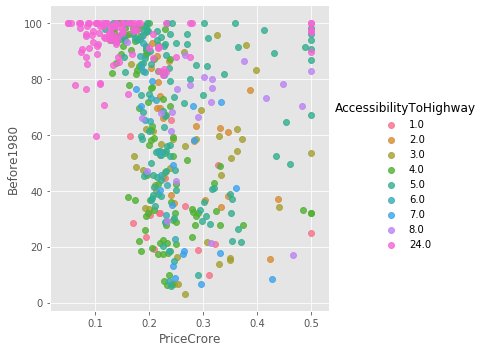

In [0]:
#Let's check how Before1980 and PriceCrore
sns.lmplot(x="PriceCrore",y="Before1980",hue="AccessibilityToHighway",data=mumbai,
                      fit_reg=False)

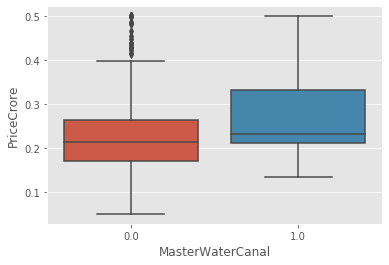

In [0]:
#Let's plot boxplot
sns.boxplot(x="MasterWaterCanal", y="PriceCrore",data = mumbai)

#### Model Building 

In [0]:
#Let's drop AccessibilityToHighway as it's highly correlated with Tax
#Splitting the dataset into features and label

X = mumbai.drop(['PriceCrore','AccessibilityToHighway'],axis=1)

y = mumbai['PriceCrore']


In [0]:
#Importing train_test_split module from sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=151) 

In [0]:
#Importing Linear Regression algorithm
from sklearn.linear_model import LinearRegression

#Creating an instance
reg = LinearRegression()

In [0]:
reg_model = reg.fit(X_train,y_train)

#### Train Evaluation

In [0]:
#importing metrics from sklearn (MSE,MAE,RMSE)

from sklearn.metrics import mean_absolute_error,mean_squared_error



In [0]:
#Predict on test data
train_pred =reg.predict(X_train)

#Mean squared error
MSE = mean_squared_error(y_train,train_pred)

#Mean Absolute error
MAE = mean_absolute_error(y_train,train_pred)
print('Train_MAE:{}'.format(MAE)) 

#Root Mean Squared error
print('Train_RMSE:{}'.format(np.sqrt(MSE)))

Train_MAE:0.03256025781582992
Train_RMSE:0.04665299587972876


###Test

In [0]:
test_pred = reg_model.predict(X_test)

### Test Evaluation

In [0]:
#Mean squared error
MSE = mean_squared_error(y_test,test_pred)

#Mean Absolute error
MAE = mean_absolute_error(y_test,test_pred)
print('Test_MAE:{}'.format(MAE)) 

#Root Mean Squared error
print('Test_RMSE:{}'.format(np.sqrt(MSE)))

Test_MAE:0.039177060046496445
Test_RMSE:0.06103048890740182


### **Save the Model**

In [0]:
#Saving the Model
lm_save_filename = r"C:\Users\hp\Desktop\UpX Academy\Pickle Files\lm_model.pkl"
lm_model_pkl = open("lm_save_filename",'wb')
pickle.dump(reg_model,lm_model_pkl)
lm_model_pkl.close()

model_columns_pkl = open("model_columns_pkl",'wb')
pickle.dump(X_train.columns,model_columns_pkl)
model_columns_pkl.close()



###  Predict on new data

###  Read New Data

In [0]:
new_data = pd.read_csv(r"New_Mumbai_Housing.csv")
new_data=new_data.drop(['AccessibilityToHighway','NumberofPlaygrounds'],axis=1)
new_data.head()

,CrimeRate,PropResidential,PropBusiness,MasterWaterCanal,NitricOxide,AvgRooms,Before1980,DistanceFromBusinessCenter,Tax,TeacherStudentRatio,BaseCorruptionRate,BelowMiddleClass
0,6.71772,0,18.1,0,0.713,6.749,92.6,2.3236,666,20.2,0.32,17.44
1,5.44114,0,18.1,0,0.713,6.655,98.2,2.3552,666,20.2,355.29,17.73
2,5.09017,0,18.1,0,0.713,6.297,91.8,2.3682,666,20.2,385.09,17.27
3,8.24809,0,18.1,0,0.713,7.393,99.3,2.4527,666,20.2,375.87,16.74
4,9.51363,0,18.1,0,0.713,6.728,94.1,2.4961,666,20.2,76.68,18.71


#### Predict on new data 

In [0]:
new_pred = reg_model.predict(new_data) 

In [0]:
print(new_pred)

[0.16404969 0.19416972 0.18154058 0.23428881 0.16029807 0.15533686
 0.11739921 0.11838848 0.1673334  0.17705101 0.18980412 0.19619954
 0.19213893 0.21706849 0.19429765 0.16494432 0.12953522 0.15760419
 0.15887851 0.16986307 0.1887996  0.21140911 0.21381529 0.25177931
 0.14256493 0.15358006 0.1993536  0.1014922  0.182352   0.20649212
 0.21732897 0.2564284  0.27436812 0.18879943 0.17862731 0.20922983
 0.18294499 0.19538767 0.15711261 0.12480113 0.08020418 0.18242833
 0.20129737 0.21012848 0.21521856 0.17973456 0.1470908  0.19700653
 0.22078991 0.18787969 0.21276937 0.25111127 0.2321894  0.29127291
 0.27499556 0.22943206]
